 # varying parameters that describe mini-halos and see the impact to the global signal

In [7]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import py21cmfast as p21c

print("21cmFAST with a git commit number of da7d321629a6c8a38682cb4879cbf3105978230b")

21cmFAST with a git commit number of da7d321629a6c8a38682cb4879cbf3105978230b


This is an example to show how parameters of minihalos affect the 21-cm global signal in a box of "HII_DIM": 50 and "BOX_LEN": 100.

We keep other parameters fixed and vary one of following  by a factor of 0.1, 0.5, 2 and 10:

    pow(10, "F_STAR7_MINI")
    pow(10, "F_ESC7_MINI")
    pow(10, "L_X_MINI")
    1 - "F_H2_SHIELD"

Note that the reference model has 

    pow(10, "F_STAR7_MINI") = pow(10, "F_STAR10") / pow(1000,ALPHA_STAR) * 10 # 10 times enhancement
    pow(10, "F_ESC7_MINI" ) = pow(10, "F_ESC10" ) / pow(1000,ALPHA_ESC ) / 10 # 0.1 times enhancement to balance the 10 times enhanced Ngamma
    pow(10, "L_X_MINI"    ) = pow(10, "L_X")
    1 - "F_H2_SHIELD"  = 1
    
We also have a NOmini model where mini-halos are not included

In [2]:
# defining the variables
HII_DIM = 50
BOX_LEN = 100

# Fstarm10 is 10**F_ESC7_MINI * 1000**ALPHA_STAR
# Fescm is 10**F_ESC7_MINI
# Lx is L_X_MINI
# SS is F_H2_SHIELD
folders_Fstarm10 = [{'Fstarm10': '1e-19', 'Fescm': '1e-19', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': False},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': True},
                    {'Fstarm10': '0.05623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': True},
                    {'Fstarm10': '0.28117066255', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': True},
                    {'Fstarm10': '1.1246826502', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': True},
                    {'Fstarm10': '5.623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': True}]

folders_Fescm    = [{'Fstarm10': '1e-19', 'Fescm': '1e-19', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': False},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': True},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.0006', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': True},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.003', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': True},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.012', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': True},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.06', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': True}]

folders_Lx       = [{'Fstarm10': '1e-19', 'Fescm': '1e-19', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': False},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': True},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '39.5', 'SS': '0.0', 'USE_MINI_HALOS': True},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.1989700043', 'SS': '0.0', 'USE_MINI_HALOS': True},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.8010299957', 'SS': '0.0', 'USE_MINI_HALOS': True},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '41.5', 'SS': '0.0', 'USE_MINI_HALOS': True}]

folders_SS       = [{'Fstarm10': '1e-19', 'Fescm': '1e-19', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': False},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0', 'USE_MINI_HALOS': True},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.9', 'USE_MINI_HALOS': True},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.5', 'USE_MINI_HALOS': True}]

# define your own folders to store outputs
sim_name = '/astro/home/yuxiang.qin/projects/hybird/mini_halos_smallBox/'

linestyles      = ['-', '-',':','-.','-.',':']
colors          = ['gray','black','#e41a1c','#377eb8','#e41a1c','#377eb8']#'#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#999999']*4
lws             = [1,3,2,2,2,2]

folderss = [folders_Fstarm10, folders_Fescm, folders_Lx, folders_SS]
labelss = [['NOmini', 'reference', 'x0.1', 'x0.5', 'x2', 'x10'],] * len(folderss)
textss   = ['varying '+r'$f_{*,7}^{\rm mol}$',\
            'varying '+r'$f_{\rm esc}^{\rm mol}$',\
            'varying '+r'$L_{\rm x}^{\rm mol}$',\
            'varying '+r'$1-f_{\rm H_2}^{\rm shield}$']

# running and plotting the global signal

<span style="color:red">Warning: each simulation takes ~8hours with the current parameter set!</span>.

In [3]:
def z2freq(z):
    return 1420.4 / (z + 1.)

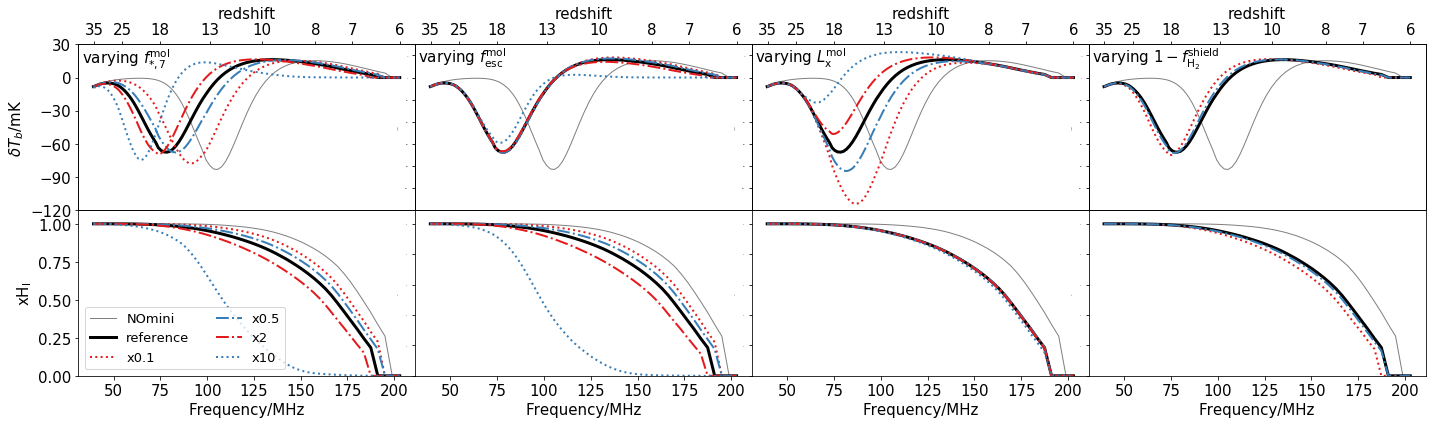

In [4]:
fig, axss = plt.subplots(2, len(folderss), sharex=True,figsize=(5*len(folderss),6))

# Since initial_conditions remain unchanged in these simulations, I've stored them in a templete folder.
# You can change pass `output_dir` defined below to `direc` and output initial_conditions inside `output_dir`
initial_conditions = p21c.initial_conditions(user_params = {"HII_DIM": HII_DIM, "BOX_LEN": BOX_LEN, 'USE_FFTW_WISDOM':True},random_seed=1994, 
                                             direc=sim_name+'/programs/templates/Boxes/')

for pp, folders in enumerate(folderss):
    labels = labelss[pp]
    texts  = textss[pp]
    axs    = axss[:,pp]
    for kk, folder_param in enumerate(folders):
        output_dir = sim_name+'/results/Fstarm10%s_Fescm%s_Lx%s_SS%s/'%\
                     (folder_param['Fstarm10'], folder_param['Fescm'], folder_param['Lx'], folder_param['SS'])
        F_STAR7_MINI = np.log10(float(folder_param['Fstarm10'])) - 1.5
        F_ESC7_MINI  = np.log10(float(folder_param['Fescm']))
        L_X_MINI     = float(folder_param['Lx'])
        F_H2_SHIELD  = float(folder_param['SS'])
        USE_MINI_HALOS = bool(folder_param['USE_MINI_HALOS'])                         
        lightcone = p21c.run_lightcone(
            redshift = 6.0,
            max_redshift = 30.0,
            init_box = initial_conditions,
            flag_options = {"INHOMO_RECO":True, 'USE_MASS_DEPENDENT_ZETA':True, 'USE_TS_FLUCT':True, 'USE_MINI_HALOS': USE_MINI_HALOS},
            astro_params = {'ALPHA_ESC': 0.0, 'ALPHA_STAR': 0.5, 'F_ESC10': -1.22184874962, 'F_STAR10': -1.25, 'L_X': 40.5, 'NU_X_THRESH': 500.0,\
                            'F_STAR7_MINI': F_STAR7_MINI,'F_ESC7_MINI': F_ESC7_MINI, 'L_X_MINI': L_X_MINI, 'F_H2_SHIELD': F_H2_SHIELD},
            random_seed = 1994,
            direc = output_dir
        )
        freqs = z2freq(np.array(lightcone.node_redshifts))
        axs[0].plot(freqs, lightcone.global_brightness_temp, color=colors[kk],linestyle=linestyles[kk], label = labels[kk],lw=lws[kk])
        axs[1].plot(freqs, lightcone.global_xHI,             color=colors[kk],linestyle=linestyles[kk], label = labels[kk],lw=lws[kk])

    axs[0].text(0.01, 0.99, texts,horizontalalignment='left',verticalalignment='top',
                        transform=axs[0].transAxes,fontsize = 15)

    axs[1].set_ylim(0.,1.09)
    axs[0].set_ylim(-120,30)
    axs[1].set_xlabel('Frequency/MHz',fontsize=15)
    axs[1].xaxis.set_tick_params(labelsize=15)

    zlabels = np.array([ 6,  7,  8,  10, 13, 18, 25, 35])
    ax2 = axs[0].twiny()
    ax2.set_xlim(axs[0].get_xlim())
    ax2.set_xticks(z2freq(zlabels))
    ax2.set_xticklabels(zlabels.astype(np.str)) 
    ax2.set_xlabel("redshift",fontsize=15)
    ax2.xaxis.set_tick_params(labelsize=15)
    ax2.grid(False)
    
    if pp == 0:
        axs[1].legend(loc='lower left', ncol=2,fontsize=13,fancybox=True,frameon=True)
        axs[0].set_yticks([-120,-90, -60, -30, 0, 30])
        axs[1].set_ylabel(r'${\rm xH_I}$',fontsize=15)
        axs[0].set_ylabel(r'$\delta T_b/{\rm mK}$',fontsize=15)
        axs[0].yaxis.set_tick_params(labelsize=15)
        axs[1].yaxis.set_tick_params(labelsize=15)
    else:
        axs[1].set_ylabel(r'${\rm xH_I}$',fontsize=0)
        axs[0].set_ylabel(r'$\delta T_b/{\rm mK}$',fontsize=0)
        axs[0].yaxis.set_tick_params(labelsize=0)
        axs[1].yaxis.set_tick_params(labelsize=0)
    
plt.tight_layout()
fig.subplots_adjust(hspace = 0.0,wspace=0.0)

# re-running and plotting the 21cm power spectra

<span style="color:green">INFO: now we will reuse cached files from previous runs, each simulation only takes ~10s!</span>.

In [5]:
# define functions to calculate PS, following py21cmmc
from powerbox.tools import get_power

def compute_power(
   box,
   length,
   n_psbins,
   log_bins=True,
   ignore_kperp_zero=True,
   ignore_kpar_zero=False,
   ignore_k_zero=False,
):
    # Determine the weighting function required from ignoring k's.
    k_weights = np.ones(box.shape, dtype=np.int)
    n0 = k_weights.shape[0]
    n1 = k_weights.shape[-1]

    if ignore_kperp_zero:
        k_weights[n0 // 2, n0 // 2, :] = 0
    if ignore_kpar_zero:
        k_weights[:, :, n1 // 2] = 0
    if ignore_k_zero:
        k_weights[n0 // 2, n0 // 2, n1 // 2] = 0

    res = get_power(
        box,
        boxlength=length,
        bins=n_psbins,
        bin_ave=False,
        get_variance=False,
        log_bins=log_bins,
        k_weights=k_weights,
    )

    res = list(res)
    k = res[1]
    if log_bins:
        k = np.exp((np.log(k[1:]) + np.log(k[:-1])) / 2)
    else:
        k = (k[1:] + k[:-1]) / 2

    res[1] = k
    return res

def powerspectra(brightness_temp, n_psbins=50, nchunks=10, min_k=0.1, max_k=1.0, logk=True):
    data = []
    chunk_indices = list(range(0,brightness_temp.n_slices,round(brightness_temp.n_slices / nchunks),))

    if len(chunk_indices) > nchunks:
        chunk_indices = chunk_indices[:-1]
    chunk_indices.append(brightness_temp.n_slices)

    for i in range(nchunks):
        start = chunk_indices[i]
        end = chunk_indices[i + 1]
        chunklen = (end - start) * brightness_temp.cell_size

        power, k = compute_power(
            brightness_temp.brightness_temp[:, :, start:end],
            (BOX_LEN, BOX_LEN, chunklen),
            n_psbins,
            log_bins=logk,
        )
        data.append({"k": k, "delta": power * k ** 3 / (2 * np.pi ** 2)})
    return data

/astro/home/yuxiang.qin/3rd_party/lib/python3.6/site-packages/numpy/ma/core.py:6717: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/astro/home/yuxiang.qin/3rd_party/lib/python3.6/site-packages/powerbox/tools.py:106: UserWarning: One or more radial bins had no cells within it.
  warnings.warn("One or more radial bins had no cells within it.")
/astro/home/yuxiang.qin/3rd_party/lib/python3.6/site-packages/powerbox/tools.py:160: RuntimeWarning: invalid value encountered in true_divide
  rl = np.bincount(indx, weights=np.real(field.flatten()), minlength=len(sumweights)+2)[1:-1] / sumweights


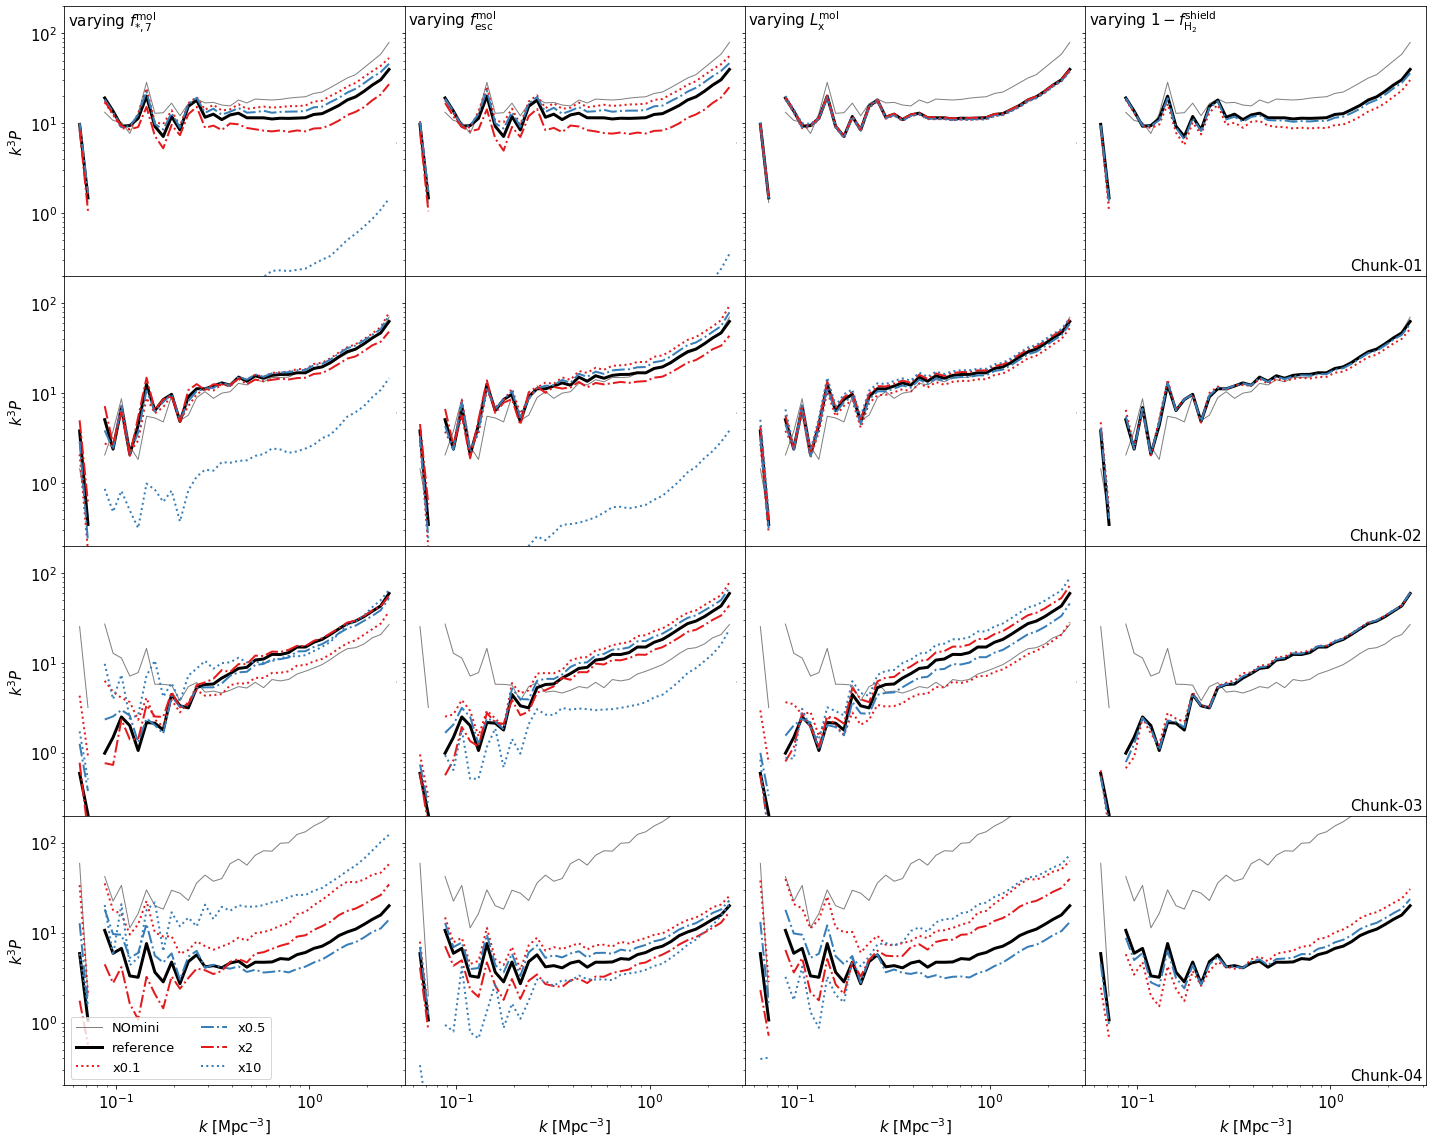

In [6]:
# do 5 chunks but only plot 1 - 4, the 0th has no power for minihalo models where xH=0
nchunks = 4

fig, axss = plt.subplots(nchunks, len(folderss), sharex=True,sharey=True,figsize=(5*len(folderss),4*(nchunks)),subplot_kw={"xscale":'log', "yscale":'log'})

initial_conditions = p21c.initial_conditions(user_params = {"HII_DIM": HII_DIM, "BOX_LEN": BOX_LEN, 'USE_FFTW_WISDOM':True},random_seed=1994, 
                                             direc=sim_name+'/programs/templates/Boxes/')

for pp, folders in enumerate(folderss):
    labels = labelss[pp]
    texts  = textss[pp]
    axs    = axss[:,pp]
    for kk, folder_param in enumerate(folders):
        output_dir = sim_name+'/results/Fstarm10%s_Fescm%s_Lx%s_SS%s/'%\
                     (folder_param['Fstarm10'], folder_param['Fescm'], folder_param['Lx'], folder_param['SS'])
        F_STAR7_MINI = np.log10(float(folder_param['Fstarm10'])) - 1.5
        F_ESC7_MINI  = np.log10(float(folder_param['Fescm']))
        L_X_MINI     = float(folder_param['Lx'])
        F_H2_SHIELD  = float(folder_param['SS'])
        USE_MINI_HALOS = bool(folder_param['USE_MINI_HALOS'])                         
        lightcone = p21c.run_lightcone(
            redshift = 6.0,
            max_redshift = 30.0,
            init_box = initial_conditions,
            flag_options = {"INHOMO_RECO":True, 'USE_MASS_DEPENDENT_ZETA':True, 'USE_TS_FLUCT':True, 'USE_MINI_HALOS': USE_MINI_HALOS},
            astro_params = {'ALPHA_ESC': 0.0, 'ALPHA_STAR': 0.5, 'F_ESC10': -1.22184874962, 'F_STAR10': -1.25, 'L_X': 40.5, 'NU_X_THRESH': 500.0,\
                            'F_STAR7_MINI': F_STAR7_MINI,'F_ESC7_MINI': F_ESC7_MINI, 'L_X_MINI': L_X_MINI, 'F_H2_SHIELD': F_H2_SHIELD},
            random_seed = 1994,
            direc = output_dir
        )
        
        PS = powerspectra(lightcone)
        for ii in range(nchunks):
            axs[ii].plot(PS[ii+1]['k'], PS[ii+1]['delta'], color=colors[kk],linestyle=linestyles[kk], label = labels[kk],lw=lws[kk])
        
            if pp == len(folders)-1 and kk == 0:
                axs[ii].text(0.99, 0.01, 'Chunk-%02d'%(ii+1),horizontalalignment='right',verticalalignment='bottom',
                        transform=axs[ii].transAxes,fontsize = 15)
            
    axs[0].text(0.01, 0.99, texts,horizontalalignment='left',verticalalignment='top',
                        transform=axs[0].transAxes,fontsize = 15)

    axs[-1].set_xlabel("$k$ [Mpc$^{-3}$]",fontsize=15)
    axs[-1].xaxis.set_tick_params(labelsize=15)
    
    if pp == 0:
        for ii in range(nchunks):
            axs[ii].set_ylim(2e-1, 2e2)
            axs[ii].set_ylabel("$k^3 P$", fontsize=15)
            axs[ii].yaxis.set_tick_params(labelsize=15)
    else:
        for ii in range(nchunks-1):
            axs[ii].set_ylim(2e-1, 2e2)
            axs[ii].set_ylabel("$k^3 P$", fontsize=0)
            axs[ii].yaxis.set_tick_params(labelsize=0)

axss[-1,0].legend(loc='lower left', ncol=2,fontsize=13,fancybox=True,frameon=True)
plt.tight_layout()
fig.subplots_adjust(hspace = 0.0,wspace=0.0)